In [26]:
#Setup

import pandas as pd
import matplotlib as mp
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
#reading of data

base_data = pd.read_csv("/Users/ravi57004/Documents/AR_analysis/Data/base_data.csv", parse_dates=True)

item_config = pd.read_csv("/Users/ravi57004/Documents/AR_analysis/Data/item_config.csv")

item_metadata = pd.read_csv("/Users/ravi57004/Documents/AR_analysis/Data/item_metadata.csv")

vendor_metadata = pd.read_csv("/Users/ravi57004/Documents/AR_analysis/Data/vendor_metadata.csv")

In [28]:
base_data

date  active_store  placed_quantity    placed_gmv warehouse  \
0       2020-01-12           5.0             24.0    256.799988        sc   
1       2020-01-19           5.0             42.0    449.399984        sc   
2       2020-01-26           6.0             40.0    427.999983        sc   
3       2020-02-02           6.0             35.0    374.499989        sc   
4       2020-02-09           8.0             36.0    385.499992        sc   
...            ...           ...              ...           ...       ...   
311507  2021-10-10         216.0           1008.0  29181.600586        cw   
311508  2021-10-17         176.0            870.0  25339.400040        cw   
311509  2021-10-24         119.0            710.0  21228.999546        cw   
311510  2021-10-31          76.0            346.0  10345.399794        cw   
311511  2021-11-07          92.0            396.0  11840.399754        cw   

        item_code    cohort  
0          302489       new  
1          302489       new  
2          302489       new  
3          302489       new  
4          302489       new  
...           ...       ...  
311507     401658  existing  
311508     401658  existing  
311509     401658  existing  
311510     401658  existing  
311511     401658  existing  

[311512 rows x 7 columns]

In [29]:
#question 1

bought_values = base_data.groupby('item_code').placed_quantity.sum()

amount_values = base_data.groupby('item_code').placed_gmv.sum()

In [30]:
amt_sorted_vals = amount_values.sort_values(ascending = False)

bought_sorted_vals = bought_values.sort_values(ascending = False)

In [31]:
# most selling item based on total amount

amt_sorted_vals 

item_code
450409    3.335536e+08
111921    3.093240e+08
389490    3.044220e+08
423497    1.756523e+08
389489    1.380936e+08
              ...     
164413    6.324101e+06
103484    6.312834e+06
107547    5.696128e+06
152898    5.451190e+06
107524    4.203918e+06
Name: placed_gmv, Length: 100, dtype: float64

In [32]:
# most selling item based on items bought

bought_sorted_vals.index[0]

528136

In [33]:
vendor_metadata = vendor_metadata.set_index('item_code')

vendor_metadata.loc[bought_sorted_vals.index[0], 'sku_name']

item_code
528136    Great Taste White Twin Pack 50g - 10s
528136    Great Taste White Twin Pack 50g - 10s
528136    Great Taste White Twin Pack 50g - 10s
528136    Great Taste White Twin Pack 50g - 10s
528136    Great Taste White Twin Pack 50g - 10s
528136    Great Taste White Twin Pack 50g - 10s
528136    Great Taste White Twin Pack 50g - 10s
528136    Great Taste White Twin Pack 50g - 10s
528136    Great Taste White Twin Pack 50g - 10s
528136    Great Taste White Twin Pack 50g - 10s
528136    Great Taste White Twin Pack 50g - 10s
Name: sku_name, dtype: object

In [34]:
# top 5 selling items based on total amount

def getProducts(count, struct):
    products = list()
    for i in range(count):
            products.append(vendor_metadata.loc[struct.index[i], 'sku_name'].iloc[0])
    return products

In [35]:
product_names = getProducts(5, amt_sorted_vals)
    
product_names

['Ginebra Gin Round 350ml - 1s',
 'Marlboro Red  20sticks - 1s',
 'Emperador Brandy Light 1L - 1s',
 'Alfonso 1 Brandy Light 1L - 1s',
 'Emperador Brandy Light 750ml - 1s']

In [36]:
top_five = amt_sorted_vals.head()

<AxesSubplot:title={'center':'Top five items sold'}, ylabel='placed_gmv'>

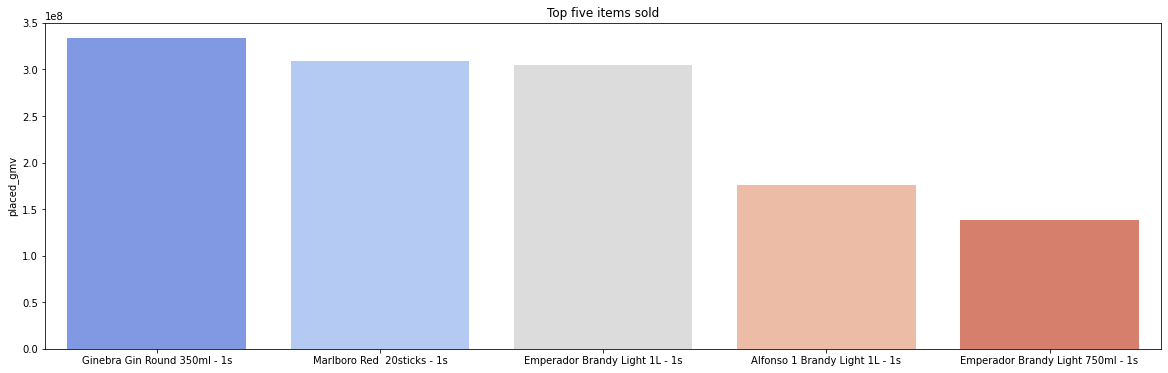

In [37]:
plt.figure(figsize = (20, 6))

plt.title("Top five items sold")

sns.barplot(x = product_names, y = top_five, palette = 'coolwarm')

In [38]:
desc_vals = amount_values.sort_values()

vendor_metadata.loc[desc_vals.index[0], 'sku_name']

item_code
107524    Mr. Chips Nacho Cheese 26g - 1s
107524    Mr. Chips Nacho Cheese 26g - 1s
107524    Mr. Chips Nacho Cheese 26g - 1s
107524    Mr. Chips Nacho Cheese 26g - 1s
107524    Mr. Chips Nacho Cheese 26g - 1s
107524    Mr. Chips Nacho Cheese 26g - 1s
107524    Mr. Chips Nacho Cheese 26g - 1s
107524    Mr. Chips Nacho Cheese 26g - 1s
107524    Mr. Chips Nacho Cheese 26g - 1s
107524    Mr. Chips Nacho Cheese 26g - 1s
107524    Mr. Chips Nacho Cheese 26g - 1s
Name: sku_name, dtype: object

<AxesSubplot:title={'center':'Bottom five items sold'}, ylabel='placed_gmv'>

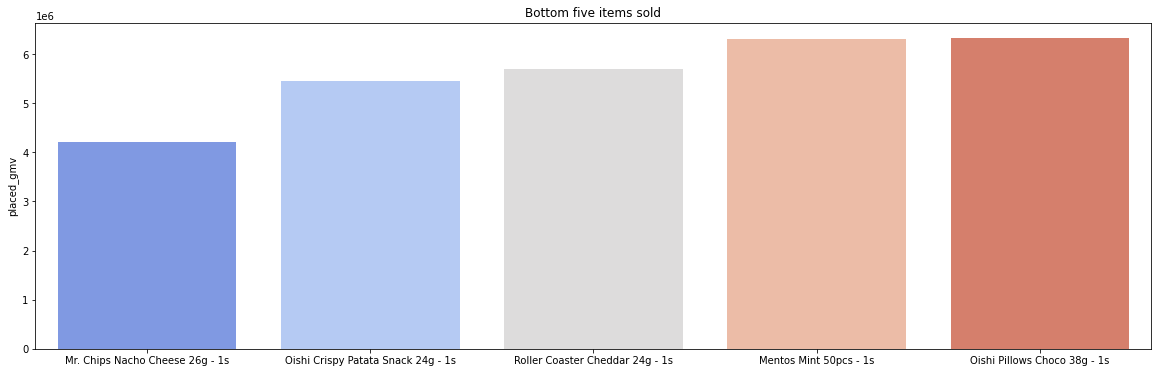

In [39]:
bottom_five = desc_vals.head()

product_names = getProducts(5, desc_vals )

plt.figure(figsize = (20, 6))

plt.title("Bottom five items sold")

sns.barplot(x = product_names, y = bottom_five, palette = 'coolwarm')

In [40]:
# top 10 selling items based on total amount

top_ten = amt_sorted_vals.head(10)

<AxesSubplot:title={'center':'Top ten items sold'}, ylabel='placed_gmv'>

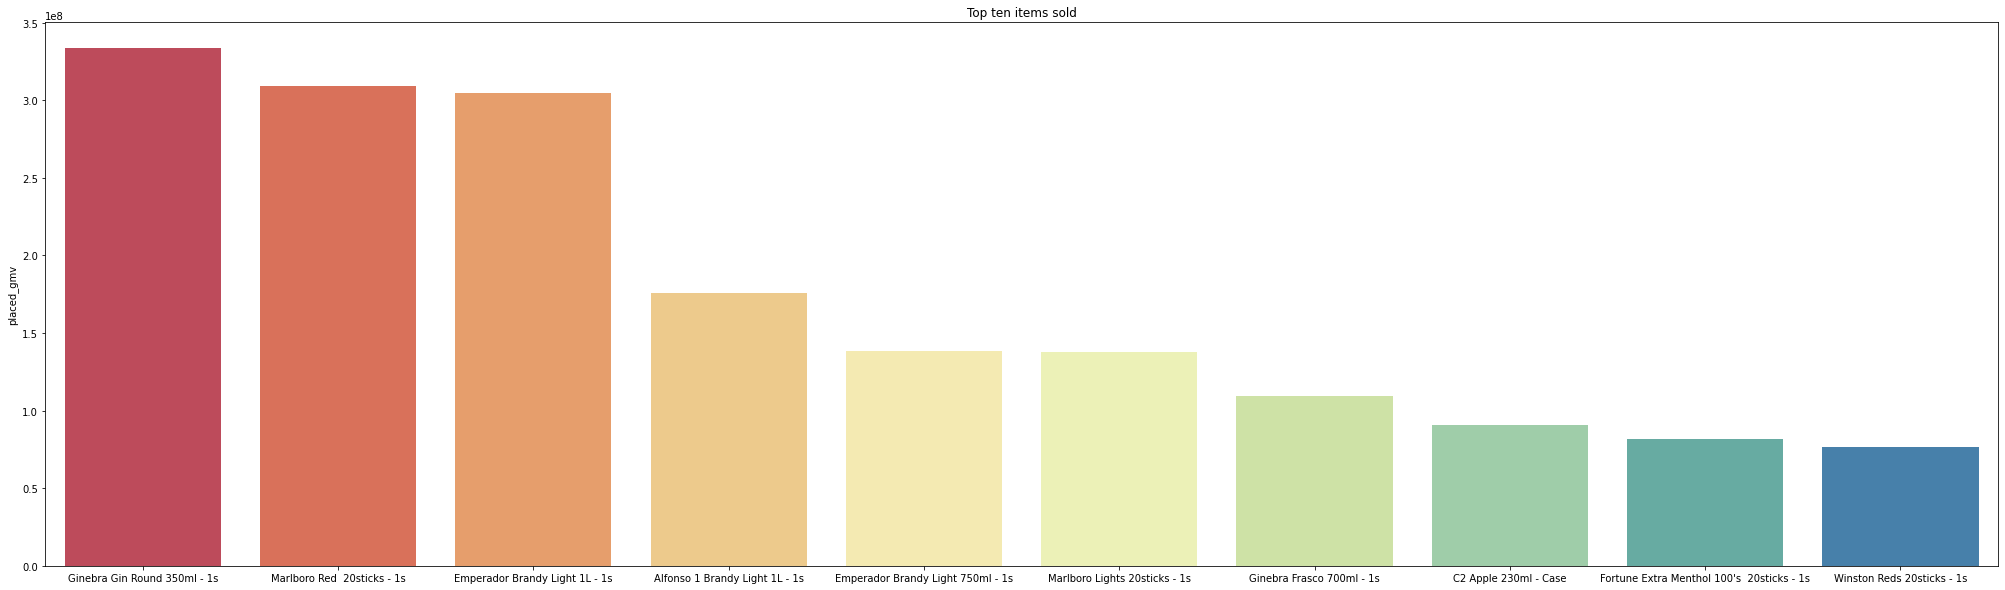

In [41]:
product_names = getTopProducts(10)

plt.figure(figsize = (35, 10))

plt.title("Top ten items sold")

sns.barplot(x = product_names, y = top_ten, palette = "Spectral")

In [43]:
#question 2
# best selling in each cohort by item code

new_values = base_data.groupby(['cohort','item_code']).placed_gmv.sum()

new_values = new_values.reset_index()

new_values

cohort  item_code    placed_gmv
0    existing     100706  3.671471e+07
1    existing     100934  1.280788e+07
2    existing     100941  1.304853e+07
3    existing     103277  1.735957e+07
4    existing     103484  5.557109e+06
..        ...        ...           ...
295   revived     565038  5.945579e+05
296   revived     565492  9.880515e+05
297   revived     581359  4.621503e+05
298   revived     584835  3.021851e+06
299   revived     598640  6.207726e+05

[300 rows x 3 columns]

In [44]:
existing = new_values.loc[0:99, 'placed_gmv']

In [45]:
existing.sort_values(ascending = False)

70    2.941552e+08
30    2.739036e+08
63    2.666171e+08
67    1.561627e+08
29    1.222597e+08
          ...     
40    5.614822e+06
4     5.557109e+06
14    4.934510e+06
37    4.812584e+06
13    3.672255e+06
Name: placed_gmv, Length: 100, dtype: float64

In [46]:
new_values.loc[70, 'item_code']

450409

In [47]:
newv = new_values.loc[100:199, 'placed_gmv']

newv.sort_values(ascending = False)

170    2.544207e+07
163    2.445075e+07
130    2.436401e+07
162    1.227242e+07
167    1.222389e+07
           ...     
114    5.451016e+05
104    5.323834e+05
140    4.980365e+05
137    4.464846e+05
113    3.854928e+05
Name: placed_gmv, Length: 100, dtype: float64

In [48]:
new_values.loc[170, 'item_code']

450409

In [49]:
revived = new_values.loc[200:299, 'placed_gmv']

revived.sort_values(ascending = False)

270    1.395637e+07
263    1.335412e+07
230    1.105643e+07
267    7.265764e+06
262    6.327687e+06
           ...     
214    2.165160e+05
272    2.163615e+05
240    2.112423e+05
237    1.921215e+05
213    1.461709e+05
Name: placed_gmv, Length: 100, dtype: float64

In [50]:
new_values.loc[270, 'item_code']

450409

In [52]:
new_values.loc[13, 'item_code']

107524

In [53]:
new_values.loc[113, 'item_code']

107524

In [54]:
new_values.loc[213, 'item_code']

107524

In [56]:
# best selling in each cohort by category

item_metadata = pd.read_csv("/Users/ravi57004/Documents/AR_analysis/Data/item_metadata.csv", index_col = 0)

item_metadata.loc['450409', 'category_name']

'alcohol'

In [58]:
item_metadata.loc['450409', 'sub_cat_name']

'liquors aperitifs'

In [59]:
item_metadata.loc['107524', 'category_name']

'chips'

In [61]:
item_metadata.loc['107524', 'sub_cat_name']

'chips'

In [62]:
#question 3

supplier_info = vendor_metadata.groupby(['vendor_name']).sku_name.count()

In [64]:
asc_suppliers = supplier_info.sort_values(ascending = False)

asc_suppliers.head()

vendor_name
none                                2322
ACRO 210028-UNILEVER PHILS.          512
UNIVERSAL ROBINA CORPORATION         495
PROCTER & GAMBLE PHILIPPINES INC     418
MONDE NISSIN CORPORATION             321
Name: sku_name, dtype: int64

In [66]:
desc_suppliers = supplier_info.sort_values()

desc_suppliers.head()

vendor_name
COMMONWEALTH FOODS, INCORPORATED    10
JBC FOOD CORPORATION                11
ANNIE CANDY MANUFACTURING           11
SLORD DEVELOPMENT CORPORATION       11
NUTRITIVE SNACK FOOD CORPORATION    11
Name: sku_name, dtype: int64

In [78]:
#question 4

grouping = pd.DataFrame(base_data.groupby(['cohort', 'item_code']).placed_quantity.sum())

grouping = grouping.reset_index()

existing = grouping.iloc[0:100]

new = grouping.iloc[100:200]

revived = grouping.iloc[200:300]

In [79]:
item_config = pd.read_csv("/Users/ravi57004/Documents/AR_analysis/Data/item_config.csv", index_col = 'item_code')

grouping_sub = pd.DataFrame(grouping.item_code.astype('string'))
existing_sub = pd.DataFrame(existing.item_code.astype('string'))
new_sub = pd.DataFrame(new.item_code.astype('string'))
revived_sub = pd.DataFrame(revived.item_code.astype('string'))

def getMostPopular(cohort, cohort_sub, offset, count):
    key_vals = dict()
    for i in range(count):
        for j in item_config.index:
            if (j == cohort_sub.item_code[i + offset]):
                package = item_config.loc[j, 'format']
                if (package in key_vals.keys()):                      
                    key_vals[package] = key_vals[package] + cohort.placed_quantity[i + offset]
                else:
                    key_vals[package] =  cohort.placed_quantity[i + offset]
    return key_vals

In [80]:
key_vals = getMostPopular(existing, existing_sub, 0, 100)

max(key_vals, key=key_vals.get)

'Tie of 10'

In [81]:
min(key_vals, key=key_vals.get)

'Pack of 10'

In [82]:
key_vals = getMostPopular(new, new_sub, 100, 100)

max(key_vals, key=key_vals.get)

'Tie of 10'

In [83]:
min(key_vals, key=key_vals.get)

'Pack of 10'

In [84]:
key_vals = getMostPopular(revived, revived_sub, 200, 100)

max(key_vals, key=key_vals.get)

'Pouch'

In [85]:
min(key_vals, key=key_vals.get)

'Pack of 24'

In [86]:
key_vals = getMostPopular(grouping, grouping_sub, 0, 300)

max(key_vals, key=key_vals.get)

'Tie of 10'

In [87]:
min(key_vals, key=key_vals.get)

'Pack of 10'

Text(0, 0.5, 'Aggregate orders')

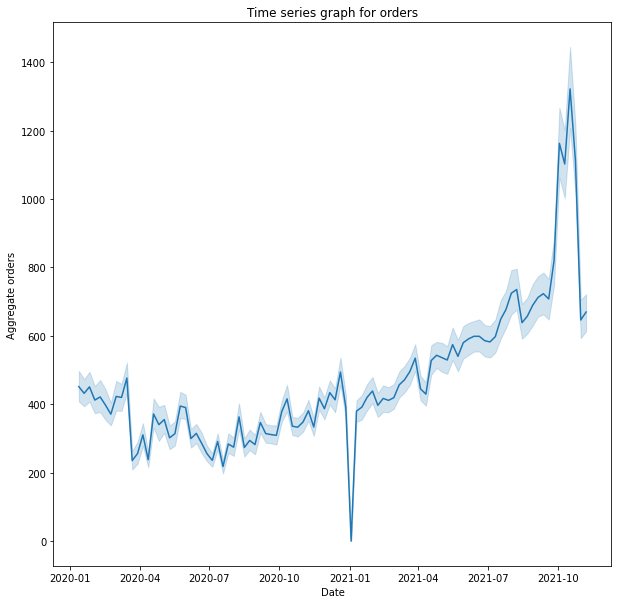

In [23]:
#question 5

#placed quantity

base_data = pd.read_csv("/Users/ravi57004/Documents/AR_analysis/Data/base_data.csv", index_col="date", parse_dates=True)

plt.figure(figsize = (10, 10))

plt.title("Time series graph for orders")

sns.lineplot(data= base_data['placed_quantity'])

plt.xlabel('Date')

plt.ylabel('Aggregate orders')

In [22]:
#gmv

plt.figure(figsize = (10, 10))

plt.title("Time series graph for gmv")

sns.lineplot(data= base_data['placed_gmv'])

plt.xlabel('Date')

plt.ylabel('Aggregate gmv')

Text(0, 0.5, 'Aggregate gmv')

Text(0, 0.5, 'Aggregate value for active stores')

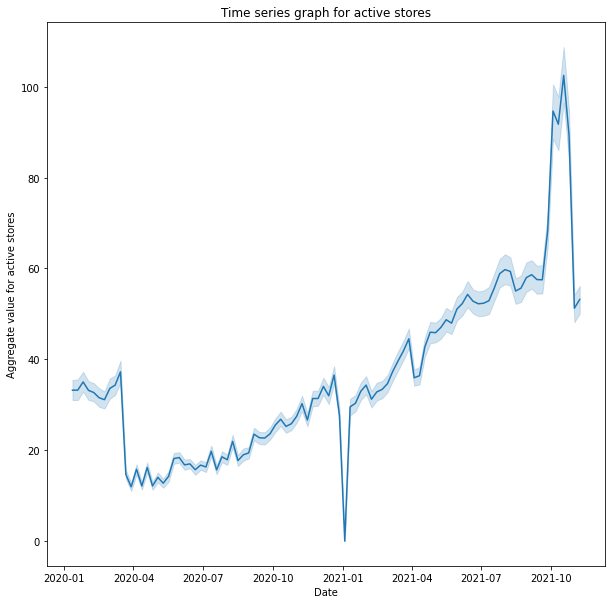

In [24]:
#active stores

plt.figure(figsize = (10, 10))

plt.title("Time series graph for active stores")

sns.lineplot(data= base_data['active_store'])

plt.xlabel('Date')

plt.ylabel('Aggregate value for active stores')

In [605]:
def plotGraph(h, v, dataframe, title, y_label, style, color):
    plt.figure(figsize = (h, v))
    plt.title(title)
    sns.set_style(style)
    graph = sns.barplot(x=dataframe.index, y=dataframe, palette = color)
    graph.set_yscale("log")
    plt.ylabel(y_label)

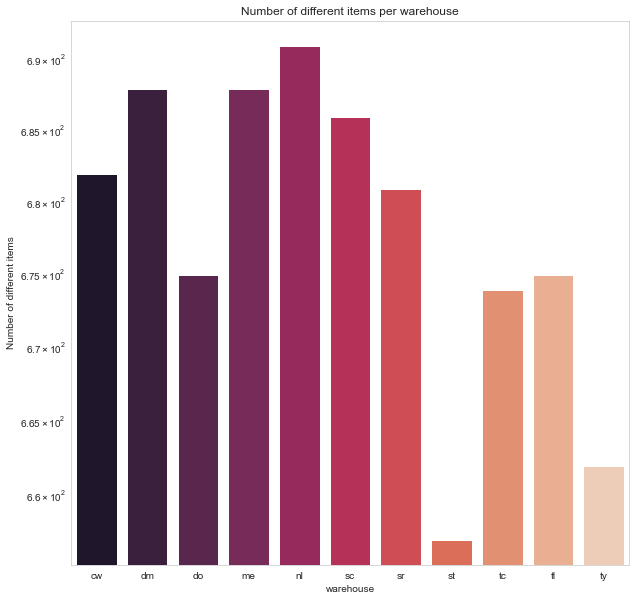

In [608]:
#question 6 pt 1

warehouse_info = vendor_metadata.groupby('warehouse').item_code.count()

plotGraph(10, 10, warehouse_info, 
          'Number of different items per warehouse', 'Number of different items', 'ticks', 'rocket')

In [612]:
#question 6 pt 2

price_info = base_data.groupby('warehouse').placed_quantity.count()

plotGraph(10, 10, price_info, 
          'Placed orders per warehouse', 'Number of orders', 'white', 'YlOrBr')

In [556]:
#question 6 pt 3

cohort_info = pd.DataFrame(base_data.groupby(['warehouse', 'cohort']).cohort.count())
                          
cohort_info = cohort_info.rename(columns={'cohort':'cohort_count'})

cohort_info = cohort_info.reset_index()

cohort_info = cohort_info.sort_values(by=['cohort', 'cohort_count'])

existing_warehouse = cohort_info.iloc[0:11].groupby('warehouse').cohort_count.max()
new_warehouse = cohort_info.iloc[11:22].groupby('warehouse').cohort_count.max()
revived_warehouse = cohort_info.iloc[22:33].groupby('warehouse').cohort_count.max()

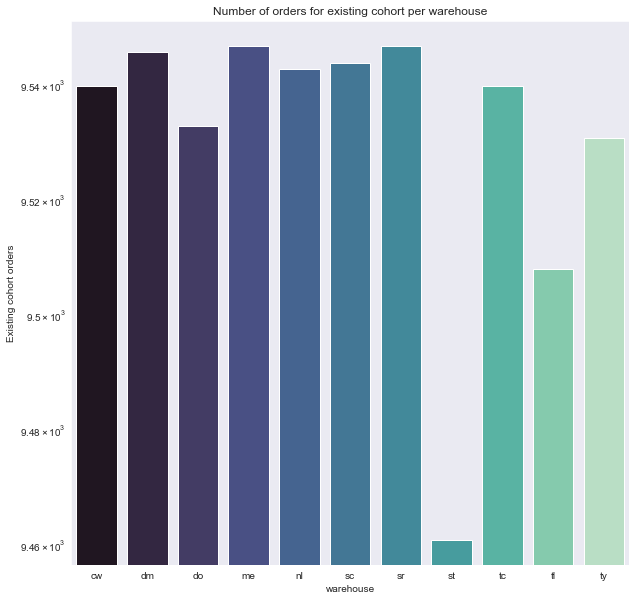

In [569]:
#existing cohort

plotGraph(10, 10, existing_warehouse, 
          'Number of orders for existing cohort per warehouse', 'Existing cohort orders', 'dark', 'mako')

In [571]:
#new cohort

plotGraph(10, 10, new_warehouse, 
          'Number of orders for new cohort per warehouse', 'New cohort orders', 'dark', 'mako')

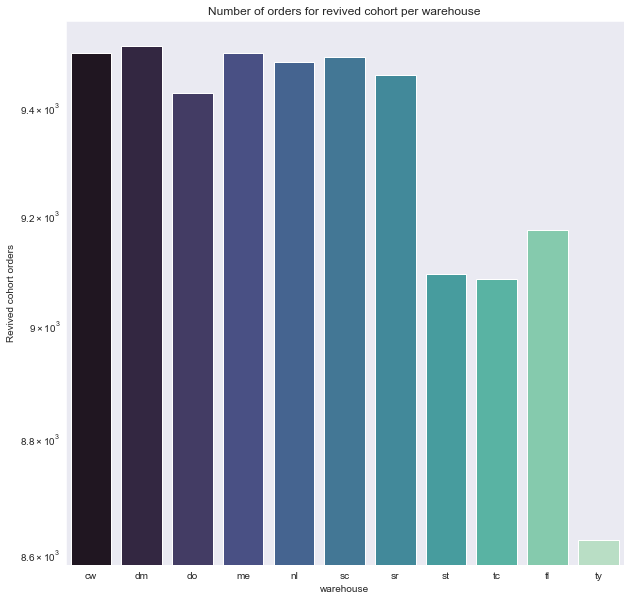

In [573]:
#revived cohort

plotGraph(10, 10, revived_warehouse, 
          'Number of orders for revived cohort per warehouse', 'Revived cohort orders',  'dark', 'mako')

Text(0, 0.5, 'Max of placed_quantity')

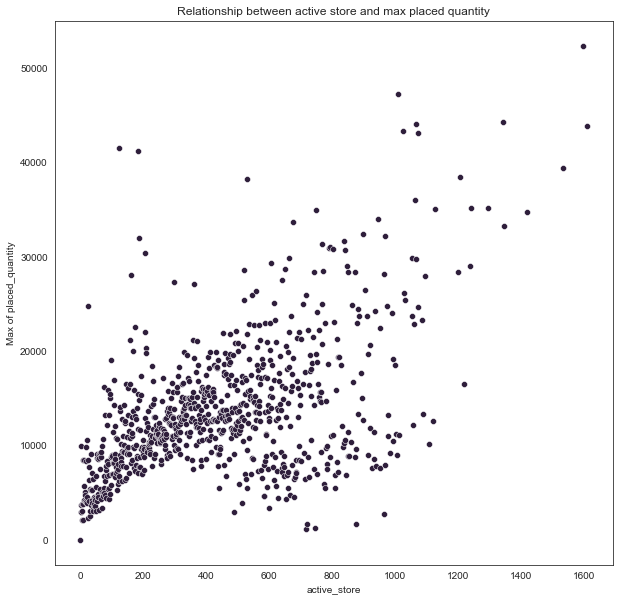

In [636]:
#question 6 pt 4

max_placed_quantity = pd.DataFrame(base_data.groupby('active_store').placed_quantity.max())

max_placed_quantity = max_placed_quantity.reset_index()

plt.figure(figsize = (10, 10))

plt.title("Relationship between active store and max placed quantity")

graph = sns.scatterplot(x=max_placed_quantity['active_store'], y=max_placed_quantity['placed_quantity'])

graph.set_ylabel('Max of placed_quantity')

In [637]:
correlation = max_placed_quantity.corr()

print(correlation["active_store"])

active_store       1.000000
placed_quantity    0.534025
Name: active_store, dtype: float64


Text(0, 0.5, 'Average placed_quantity')

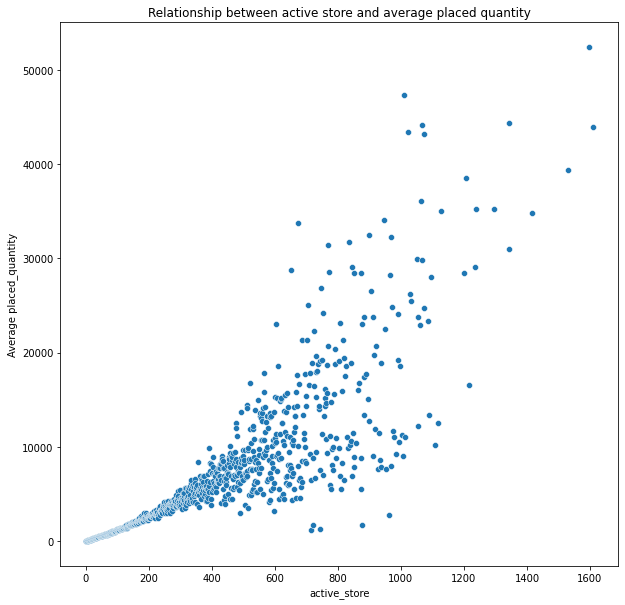

In [89]:
#question 6 pt 5

average_placed_quantity = pd.DataFrame(base_data.groupby('active_store').placed_quantity.mean())

average_placed_quantity = average_placed_quantity.reset_index()

plt.figure(figsize = (10, 10))

plt.title("Relationship between active store and average placed quantity")

graph = sns.scatterplot(x=average_placed_quantity['active_store'], y=average_placed_quantity['placed_quantity'])

graph.set_ylabel('Average placed_quantity')

#### correlation = sum_placed_quantity.corr()

print(correlation["active_store"])

In [647]:
correlation = average_placed_quantity.corr()

print(correlation["active_store"])

index              0.970905
active_store       1.000000
placed_quantity    0.825244
Name: active_store, dtype: float64
